In [1]:
!pip install pandas
!pip install nltk
!pip install wordcloud

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud, STOPWORDS
import re

# Configuration

In [7]:
dataset = 'shakespeare'
shakespeare_file = os.path.realpath(os.path.join('datasets', dataset, '{}.csv'.format(dataset)))
twitter_file = os.path.realpath(os.path.join('datasets', 'twitter', '{}.csv'.format('twitter')))
MR_file = os.path.realpath(os.path.join('datasets', 'MR', '{}.csv'.format('MR')))

In [4]:
def filter_tokens(tokens):
    stopwords = list(set(nltk.corpus.stopwords.words("english")))
    non_alphbetical = ["’", "“", ".",",",";","&","'s", ":", "?", "!","(",")", "@","'","'m","'no","*","--","...","[","]", "#", "%", "''", "$", "+"]
    clean_tokens = []
    for token in tokens:
        token = token.lower()
        token = re.sub('[\',.;]', '', token)
        if token not in stopwords and token not in non_alphbetical and len(token.strip()) > 0:
            clean_tokens.append(token)
    return clean_tokens

# Data Analysis

In [8]:
df_shakespeare = pd.read_csv(shakespeare_file, index_col = False)
df_twitter = pd.read_csv(twitter_file, index_col = False)
df_MR = pd.read_csv(MR_file, index_col = False)
df_shakespeare['clean_text'] = df_shakespeare['text'].apply(lambda x: nltk.word_tokenize(x)).apply(lambda x: filter_tokens(x))
df_shakespeare['clean_text'] = df_shakespeare['clean_text'].apply(lambda x: ' '.join(x))
df_real = df_shakespeare[df_shakespeare.label == 0]
df_fake = df_shakespeare[df_shakespeare.label == 1]


In [6]:
all_real_text = ' '.join(df_real.clean_text)
all_fake_text = ' '.join(df_fake.clean_text)

In [7]:
# average length of documents
df_shakespeare.text.apply(len).mean()

114.06472545413214

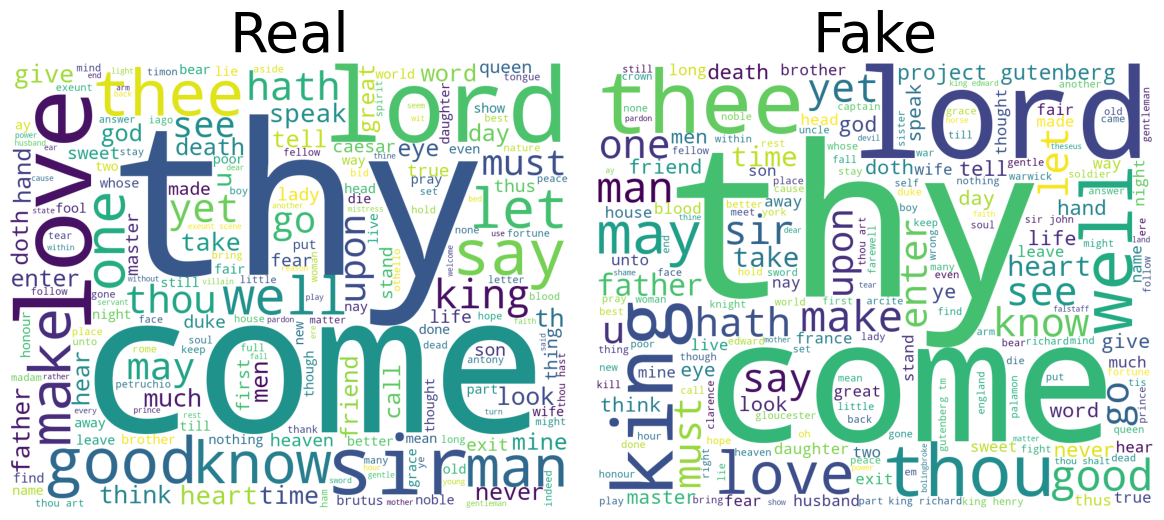

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))
ax[0].set_title('Real', fontsize = 40)
ax[1].set_title('Fake', fontsize = 40)
stopwords = set(STOPWORDS)
wordcloud_real = WordCloud(width = 1000, height = 800, background_color = 'white', min_font_size = 10).generate(all_real_text)
wordcloud_fake = WordCloud(width = 1000, height = 800, background_color = 'white', min_font_size = 10).generate(all_fake_text)
ax[0].imshow(wordcloud_real)
ax[1].imshow(wordcloud_fake)
ax[0].axis('off')
ax[1].axis('off')
plt.tight_layout(pad = 2)
plt.show()

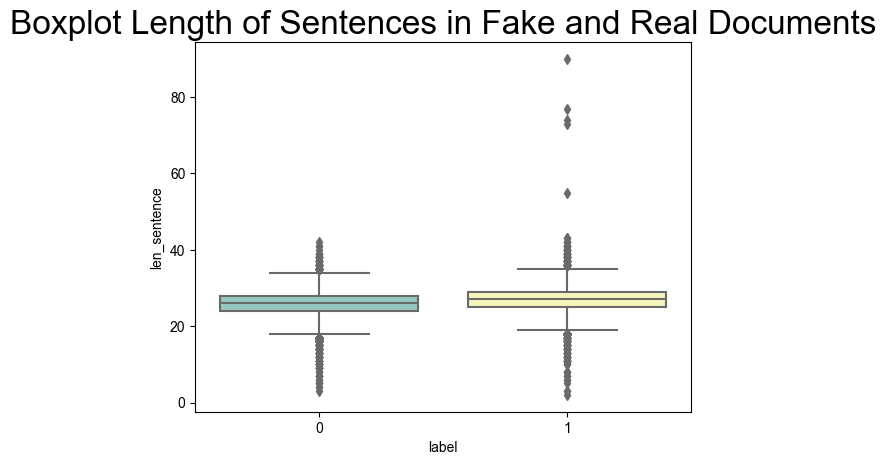

In [9]:
df['len_sentence'] = df['text'].apply(lambda x: nltk.word_tokenize(x)).apply(len)
sns.boxplot(y = 'len_sentence', x = 'label', data = df, palette = 'Set3')
sns.set(rc = {"figure.figsize":(10, 5)})
plt.title("Boxplot Length of Sentences in Fake and Real Documents", fontsize = 24)
plt.show()

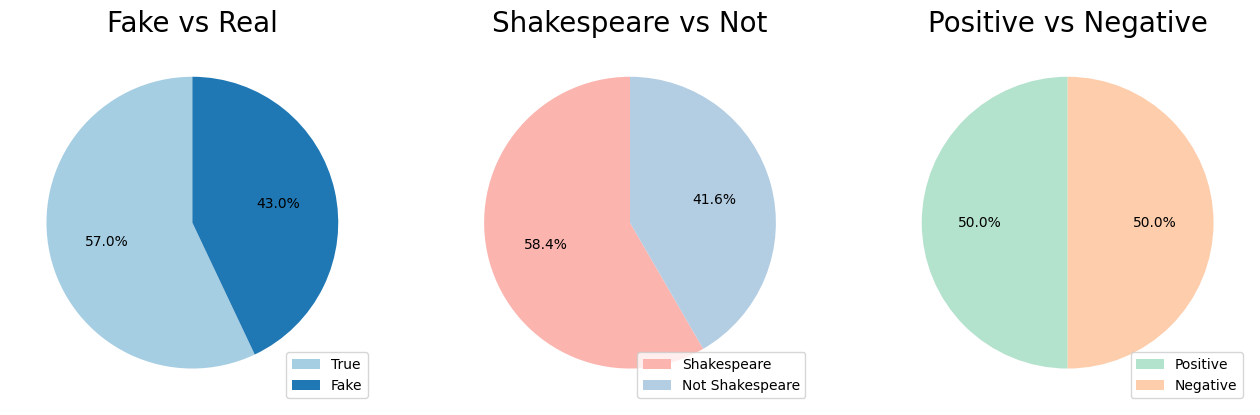

<Figure size 640x480 with 0 Axes>

In [22]:
fig, ax = plt.subplots(1, 3, figsize = (16,6))
ax[0].set_title('Fake vs Real', fontsize = 20)
ax[1].set_title('Shakespeare vs Not', fontsize = 20)
ax[2].set_title('Positive vs Negative', fontsize = 20)
labels_count = df_twitter.label.value_counts(sort = True)
#plt.figure(figsize=(7,5))
ax[0].pie(labels_count,
        autopct = '%1.1f%%', startangle = 90, colors = plt.cm.Paired(np.arange(df_twitter.label.nunique())))
ax[0].legend(labels = ['True', 'Fake'], loc = 'lower right')

labels_count = df_shakespeare.label.value_counts(sort = True)
ax[1].pie(labels_count,
        autopct = '%1.1f%%', startangle = 90, colors = plt.cm.Pastel1(np.arange(df_shakespeare.label.nunique())))
ax[1].legend(labels = ['Shakespeare', 'Not Shakespeare'], loc = 'lower right')

labels_count = df_MR.label.value_counts(sort = True)
ax[2].pie(labels_count,
        autopct = '%1.1f%%', startangle = 90, colors = plt.cm.Pastel2(np.arange(df_MR.label.nunique())))
ax[2].legend(labels = ['Positive', 'Negative'], loc = 'lower right')

plt.show()
data_dir = os.path.join(os.path.abspath(''), 'data')
plt.savefig(os.path.join(data_dir, 'Class Distribution.jpg'))
